In [1]:
# install machine gnostic learning packages
# ! pip install machinegnostics # only if not installed

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Install and import dependencies
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from machinegnostics.models import train_test_split, LinearRegressor
from machinegnostics.metrics import robr2, root_mean_squared_error, gcorrelation, hc

# Fetch dataset (Wine Quality as example)
wine_quality = fetch_ucirepo(id=186)
X = wine_quality.data.features
y = wine_quality.data.targets


/Users/nirmal/Documents/np_research/ManGo_code/machinegnostics.io/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
/Users/nirmal/Documents/np_research/ManGo_code/machinegnostics.io/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
/Users/nirmal/Documents/np_research/ManGo_code/machinegnostics.io/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict

In [5]:
gcor = gcorrelation(X, y)

# printing the results
print("G-Correlation Results:")
display(gcor.sort_values(ascending=False, by = 'quality'))

G-Correlation Results:


,quality
chlorides,0.982795
free_sulfur_dioxide,0.982450
citric_acid,0.981344
residual_sugar,0.980924
sulphates,0.980540
density,0.980064
fixed_acidity,0.978046
volatile_acidity,0.976912
pH,0.973828
alcohol,0.970563


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_seed=42)

# Ensure targets are 1D arrays
y_train = np.array(y_train).squeeze()
y_test = np.array(y_test).squeeze()

# Fit machinegnostics LinearRegression
lr = LinearRegressor(verbose=True, early_stopping=True)
lr.fit(X_train, y_train)

# Predict
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

Iteration: 1 - Machine Gnostic loss - hi : 5196.9998, rentropy: 0.0013
Iteration: 2 - Machine Gnostic loss - hi : 5196.9998, rentropy: 0.0012
Convergence reached at iteration 2 with loss/rentropy change below tolerance.


Train Robust R2: 0.2949
Test Robust R2: 0.2740
Train RMSE: 0.7408
Test RMSE: 0.7197
Train HC: 0.0567
Test HC: 0.0546


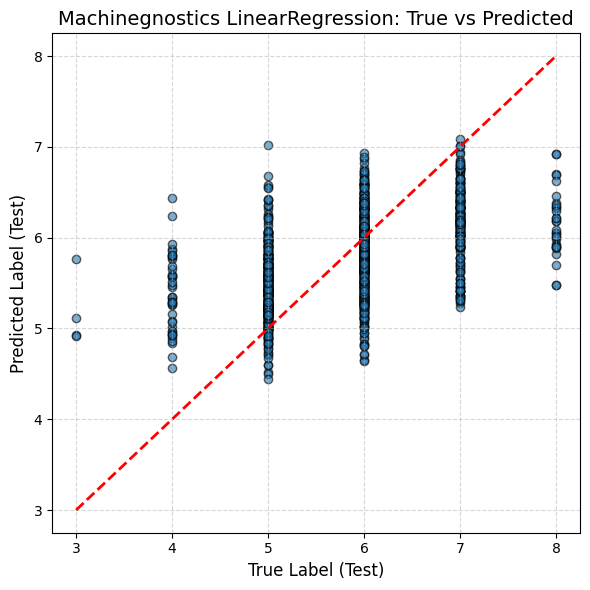

In [7]:
# Evaluate
train_r2 = robr2(y_train, y_train_pred)
test_r2 = robr2(y_test, y_test_pred)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
hc_value_train = hc(y_train, y_train_pred)
hc_value_test = hc(y_test, y_test_pred)

print(f"Train Robust R2: {train_r2:.4f}")
print(f"Test Robust R2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Train HC: {hc_value_train:.4f}")
print(f"Test HC: {hc_value_test:.4f}")

# Optional: Plot true vs predicted for test set
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='tab:blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Label (Test)', fontsize=12)
plt.ylabel('Predicted Label (Test)', fontsize=12)
plt.title('Machinegnostics LinearRegression: True vs Predicted', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

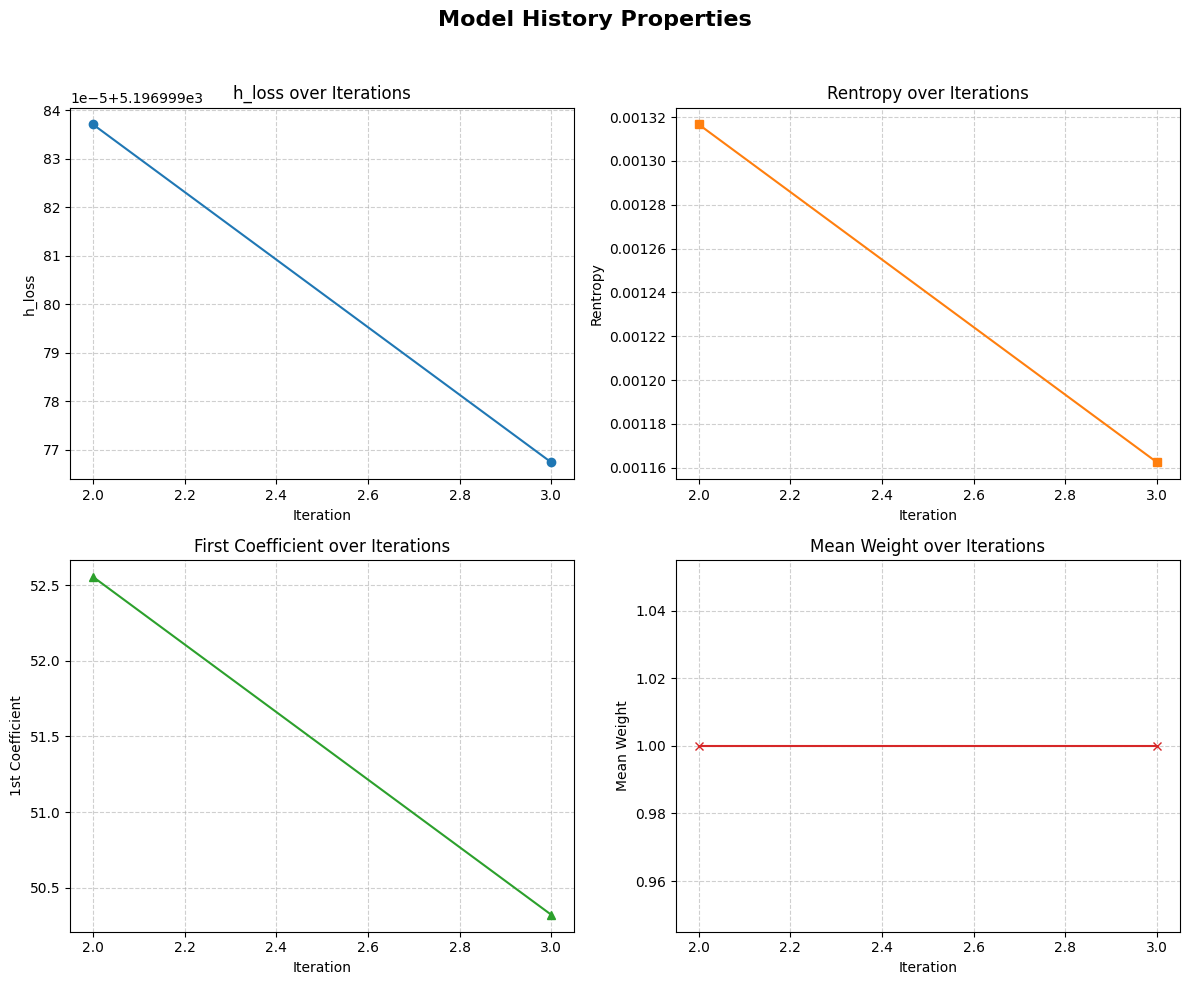

In [8]:
import matplotlib.pyplot as plt
import numpy as np

history = lr._history

# Remove entries with None for plotting
history_valid = [h for h in history if h['h_loss'] is not None]

iterations = [h['iteration'] for h in history_valid]
h_loss = [h['h_loss'] for h in history_valid]
rentropy = [h['rentropy'] for h in history_valid]
coef_0 = [h['coefficients'][0] for h in history_valid]
mean_weights = [np.mean(h['weights']) for h in history_valid]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].plot(iterations, h_loss, marker='o', color='tab:blue')
axes[0, 0].set_title('h_loss over Iterations')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('h_loss')
axes[0, 0].grid(True, linestyle='--', alpha=0.6)

axes[0, 1].plot(iterations, rentropy, marker='s', color='tab:orange')
axes[0, 1].set_title('Rentropy over Iterations')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Rentropy')
axes[0, 1].grid(True, linestyle='--', alpha=0.6)

axes[1, 0].plot(iterations, coef_0, marker='^', color='tab:green')
axes[1, 0].set_title('First Coefficient over Iterations')
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_ylabel('1st Coefficient')
axes[1, 0].grid(True, linestyle='--', alpha=0.6)

axes[1, 1].plot(iterations, mean_weights, marker='x', color='tab:red')
axes[1, 1].set_title('Mean Weight over Iterations')
axes[1, 1].set_xlabel('Iteration')
axes[1, 1].set_ylabel('Mean Weight')
axes[1, 1].grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Model History Properties', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
# cross validation
from machinegnostics.models import CrossValidator
from machinegnostics.metrics import mean_absolute_error

In [21]:
cv = CrossValidator(model=lr, X=X, y=y, k=5, random_seed=42)

In [25]:
def mae_1d(y_true, y_pred):
    return mean_absolute_error(np.asarray(y_true).squeeze(), np.asarray(y_pred).squeeze())

cv.evaluate(mae_1d)

Iteration: 1 - Machine Gnostic loss - hi : 5196.9999, rentropy: 0.0009
Convergence reached at iteration 1 with loss/rentropy change below tolerance.
Iteration: 1 - Machine Gnostic loss - hi : 5196.9988, rentropy: 0.0011
Convergence reached at iteration 1 with loss/rentropy change below tolerance.
Iteration: 1 - Machine Gnostic loss - hi : 5197.9999, rentropy: 0.0006
Convergence reached at iteration 1 with loss/rentropy change below tolerance.
Iteration: 1 - Machine Gnostic loss - hi : 5197.9998, rentropy: 0.0008
Convergence reached at iteration 1 with loss/rentropy change below tolerance.
Iteration: 1 - Machine Gnostic loss - hi : 5197.9998, rentropy: 0.0013
Convergence reached at iteration 1 with loss/rentropy change below tolerance.


[0.5697742635306392,
 0.579026250221834,
 0.5704784812704758,
 0.5703303935220199,
 0.5592398079765499]